In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [2]:
nRowsRead = 194354 # specify 'None' if want to read whole file
# deliveries.csv has 150460 rows in reality, but we are only loading/previewing the first 1000 rows
df = pd.read_csv('all_matches.csv', delimiter=',', nrows = nRowsRead)
df.dataframeName = 'deliveries.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 194354 rows and 22 columns


C:\Users\Abhishek Tyagi\anaconda\envs\tensorflow_env\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head(10)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.6,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.7,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
7,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,1.1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,1.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,1.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import os # accessing directory structure

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194354 entries, 0 to 194353
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                194354 non-null  int64  
 1   season                  194354 non-null  object 
 2   start_date              194354 non-null  object 
 3   venue                   194354 non-null  object 
 4   innings                 194354 non-null  int64  
 5   ball                    194354 non-null  float64
 6   batting_team            194354 non-null  object 
 7   bowling_team            194354 non-null  object 
 8   striker                 194354 non-null  object 
 9   non_striker             194354 non-null  object 
 10  bowler                  194354 non-null  object 
 11  runs_off_bat            194354 non-null  int64  
 12  extras                  194354 non-null  int64  
 13  wides                   5884 non-null    float64
 14  noballs             

In [6]:
df.isnull().sum()

match_id                       0
season                         0
start_date                     0
venue                          0
innings                        0
ball                           0
batting_team                   0
bowling_team                   0
striker                        0
non_striker                    0
bowler                         0
runs_off_bat                   0
extras                         0
wides                     188470
noballs                   193580
byes                      193843
legbyes                   191236
penalty                   194352
wicket_type               184794
player_dismissed          184794
other_wicket_type         194354
other_player_dismissed    194354
dtype: int64

In [7]:
s = pd.value_counts(df['wides'])
s1 = pd.Series({'nunique': len(s), 'unique values': s.index.tolist()})
s.append(s1)

1.0                                   5362
2.0                                    248
5.0                                    218
3.0                                     50
4.0                                      6
nunique                                  5
unique values    [1.0, 2.0, 5.0, 3.0, 4.0]
dtype: object

In [8]:
s = pd.value_counts(df['noballs'])
s1 = pd.Series({'nunique': len(s), 'unique values': s.index.tolist()})
s.append(s1)

1.0                               758
2.0                                 9
5.0                                 6
3.0                                 1
nunique                             4
unique values    [1.0, 2.0, 5.0, 3.0]
dtype: object

In [9]:
s = pd.value_counts(df['byes'])
s1 = pd.Series({'nunique': len(s), 'unique values': s.index.tolist()})
s.append(s1)

1.0                               347
4.0                               129
2.0                                32
3.0                                 3
nunique                             4
unique values    [1.0, 4.0, 2.0, 3.0]
dtype: object

In [10]:
s = pd.value_counts(df['legbyes'])
s1 = pd.Series({'nunique': len(s), 'unique values': s.index.tolist()})
s.append(s1)

1.0                                   2707
4.0                                    235
2.0                                    151
3.0                                     21
5.0                                      4
nunique                                  5
unique values    [1.0, 4.0, 2.0, 3.0, 5.0]
dtype: object

In [11]:
s = pd.value_counts(df['penalty'])
s1 = pd.Series({'nunique': len(s), 'unique values': s.index.tolist()})
s.append(s1)

5.0                  2
nunique              1
unique values    [5.0]
dtype: object

In [12]:
s = pd.value_counts(df['wicket_type'])
s1 = pd.Series({'nunique': len(s), 'unique values': s.index.tolist()})
s.append(s1)

caught                                                                5766
bowled                                                                1714
run out                                                                905
lbw                                                                    579
stumped                                                                294
caught and bowled                                                      277
hit wicket                                                              12
retired hurt                                                            11
obstructing the field                                                    2
nunique                                                                  9
unique values            [caught, bowled, run out, lbw, stumped, caught...
dtype: object

In [13]:
#player_dismissed
s = pd.value_counts(df['player_dismissed'])
s1 = pd.Series({'nunique': len(s), 'unique values': s.index.tolist()})
s.append(s1)

RG Sharma                                                      168
RV Uthappa                                                     165
SK Raina                                                       163
V Kohli                                                        155
S Dhawan                                                       153
                                       ...                        
BB Sran                                                          1
D du Preez                                                       1
S Ladda                                                          1
nunique                                                        510
unique values    [RG Sharma, RV Uthappa, SK Raina, V Kohli, S D...
Length: 512, dtype: object

In [14]:
#other_wicket_type
s = pd.value_counts(df['other_wicket_type'])
s1 = pd.Series({'nunique': len(s), 'unique values': s.index.tolist()})
s.append(s1)

nunique           0
unique values    []
dtype: object

In [15]:
#other_player_dismissed
s = pd.value_counts(df['other_player_dismissed'])
s1 = pd.Series({'nunique': len(s), 'unique values': s.index.tolist()})
s.append(s1)

nunique           0
unique values    []
dtype: object

Text(0.5, 1.0, 'striker V/s extras')

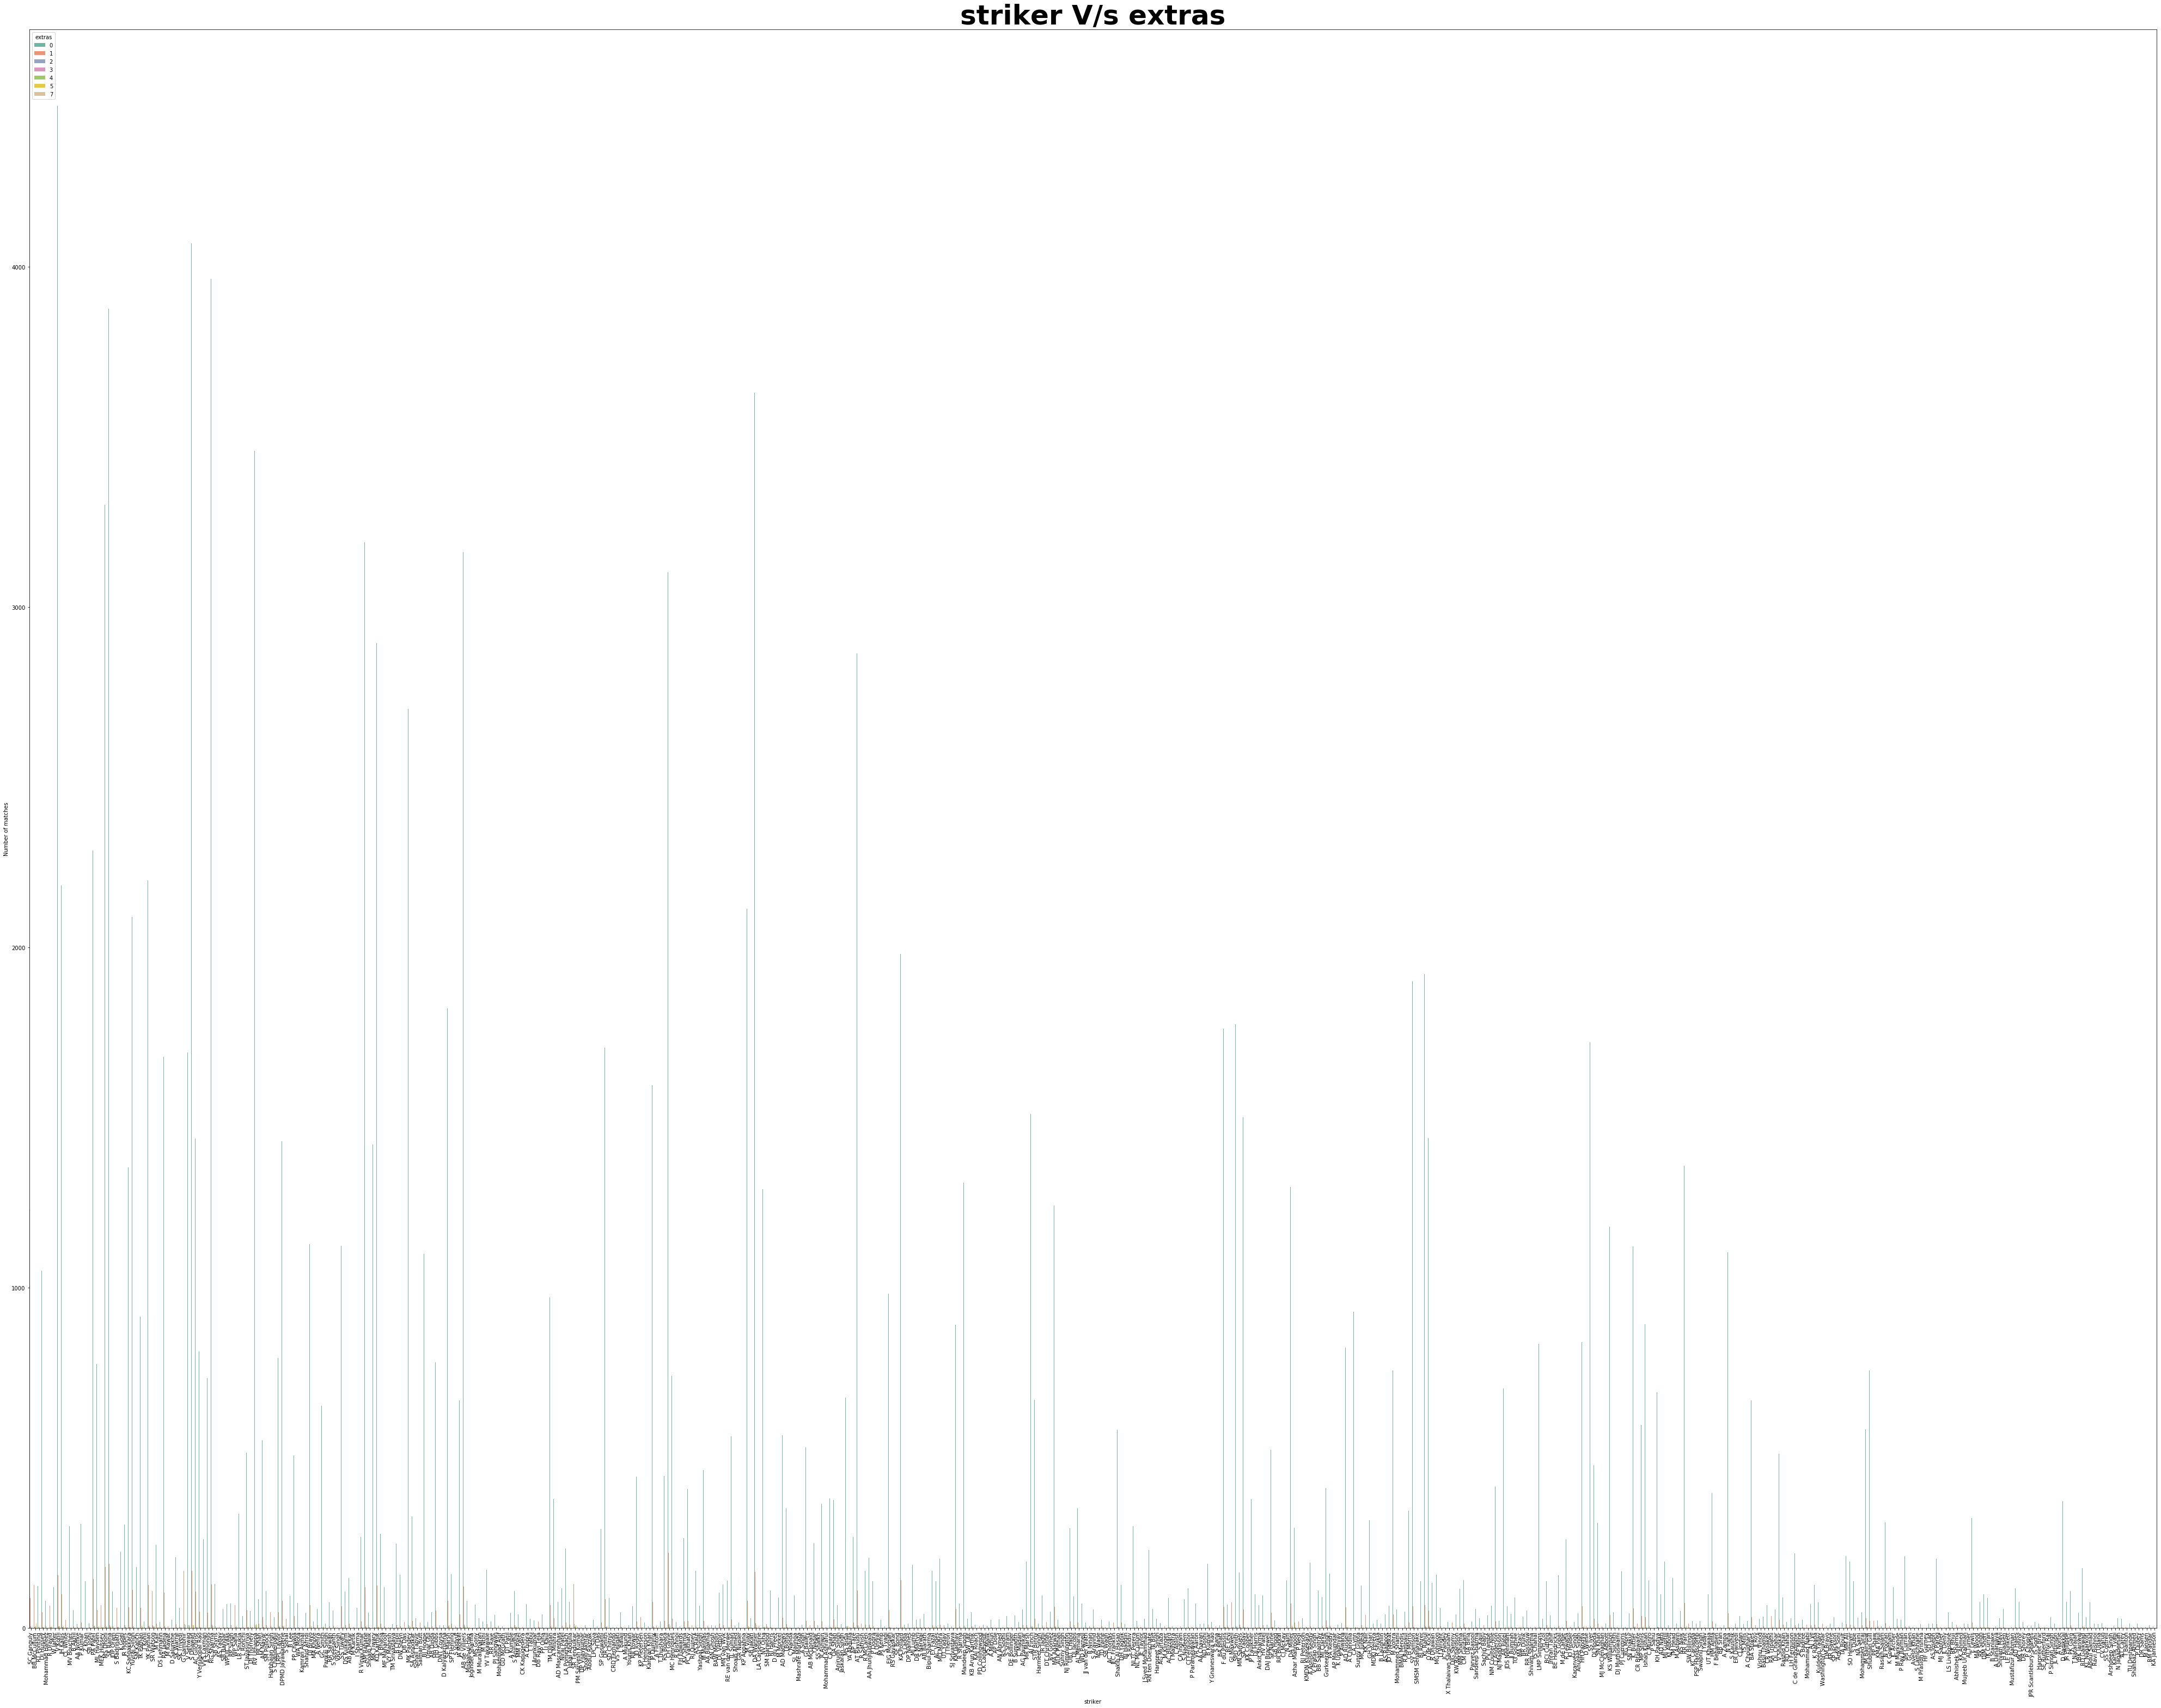

In [19]:
import seaborn as sns
plt.rcParams['figure.figsize']=70,54
sns.countplot(x=df['striker'], hue='extras', data=df, linewidth=7, palette = "Set2")
plt.ylabel('Number of matches')
plt.xticks(rotation=90)
plt.xlabel('striker')
plt.title('striker V/s extras',size=50, fontweight="bold")

Text(0.5, 1.0, 'Season V/s extras')

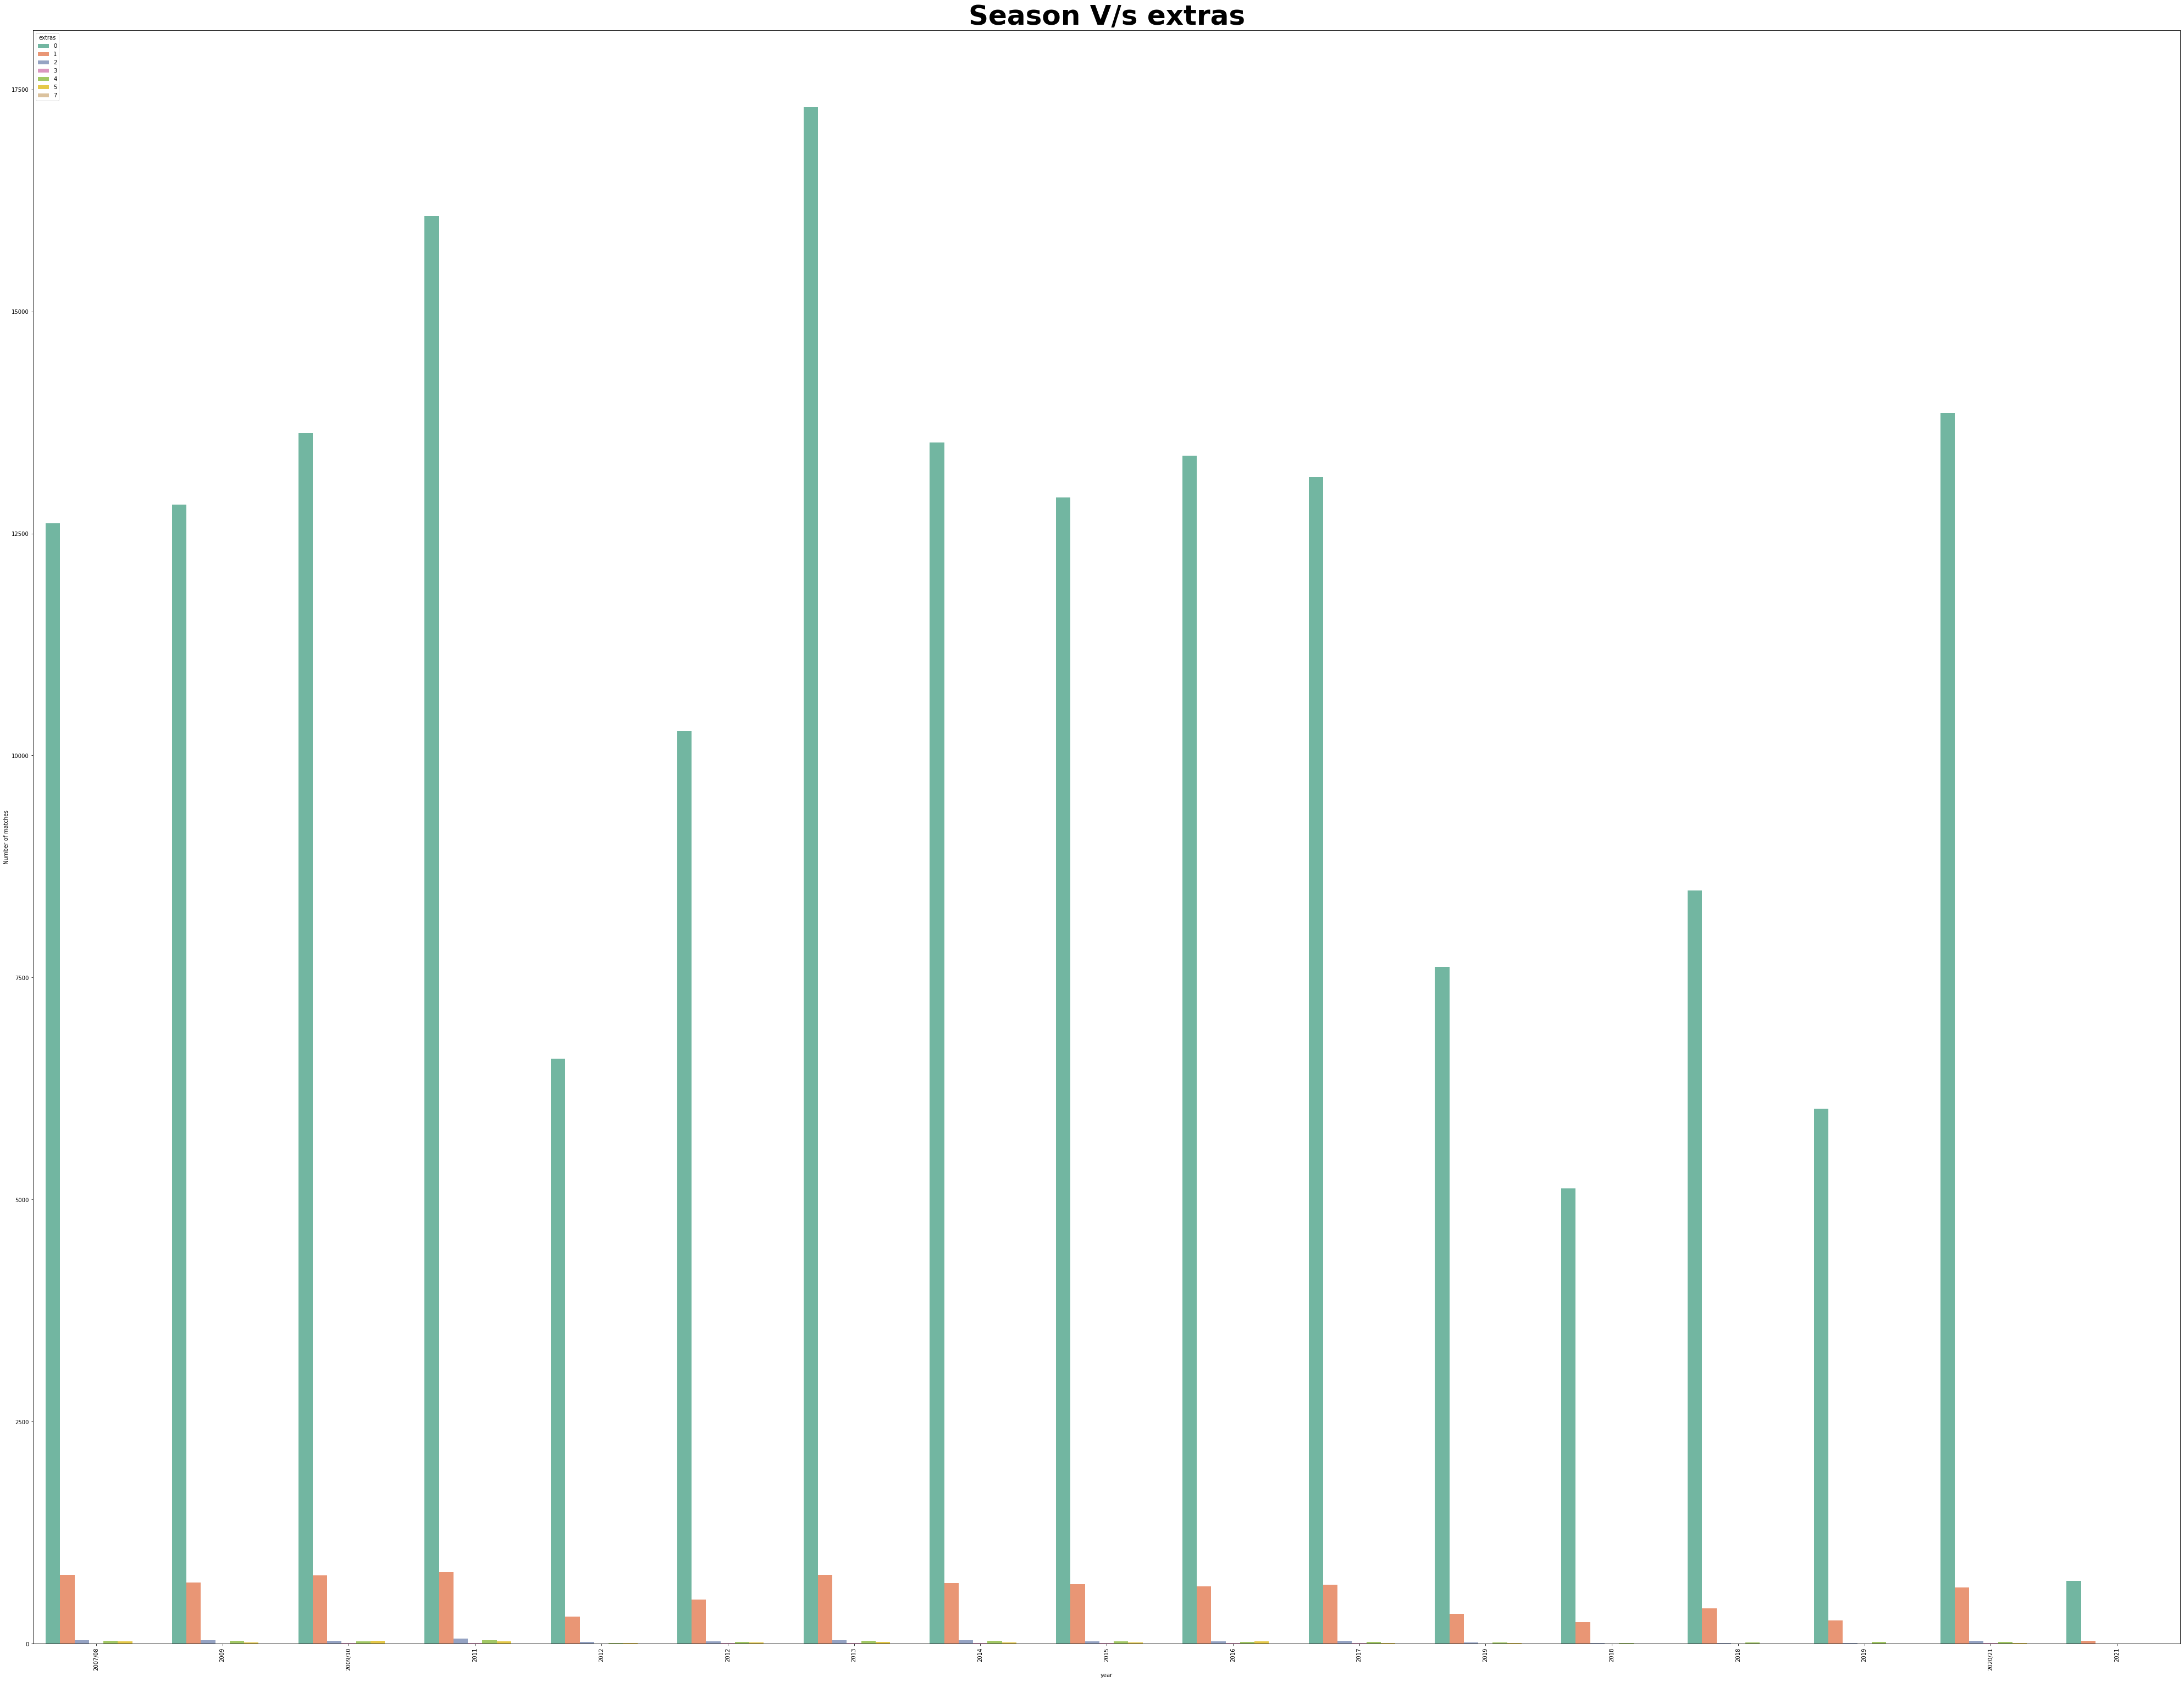

In [20]:
sns.countplot(x=df['season'], hue='extras', data=df, linewidth=7, palette = "Set2")
plt.ylabel('Number of matches')
plt.xticks(rotation=90)
plt.xlabel('year')
plt.title('Season V/s extras',size=50, fontweight="bold")

Text(0.5, 1.0, 'Season V/s Wides')

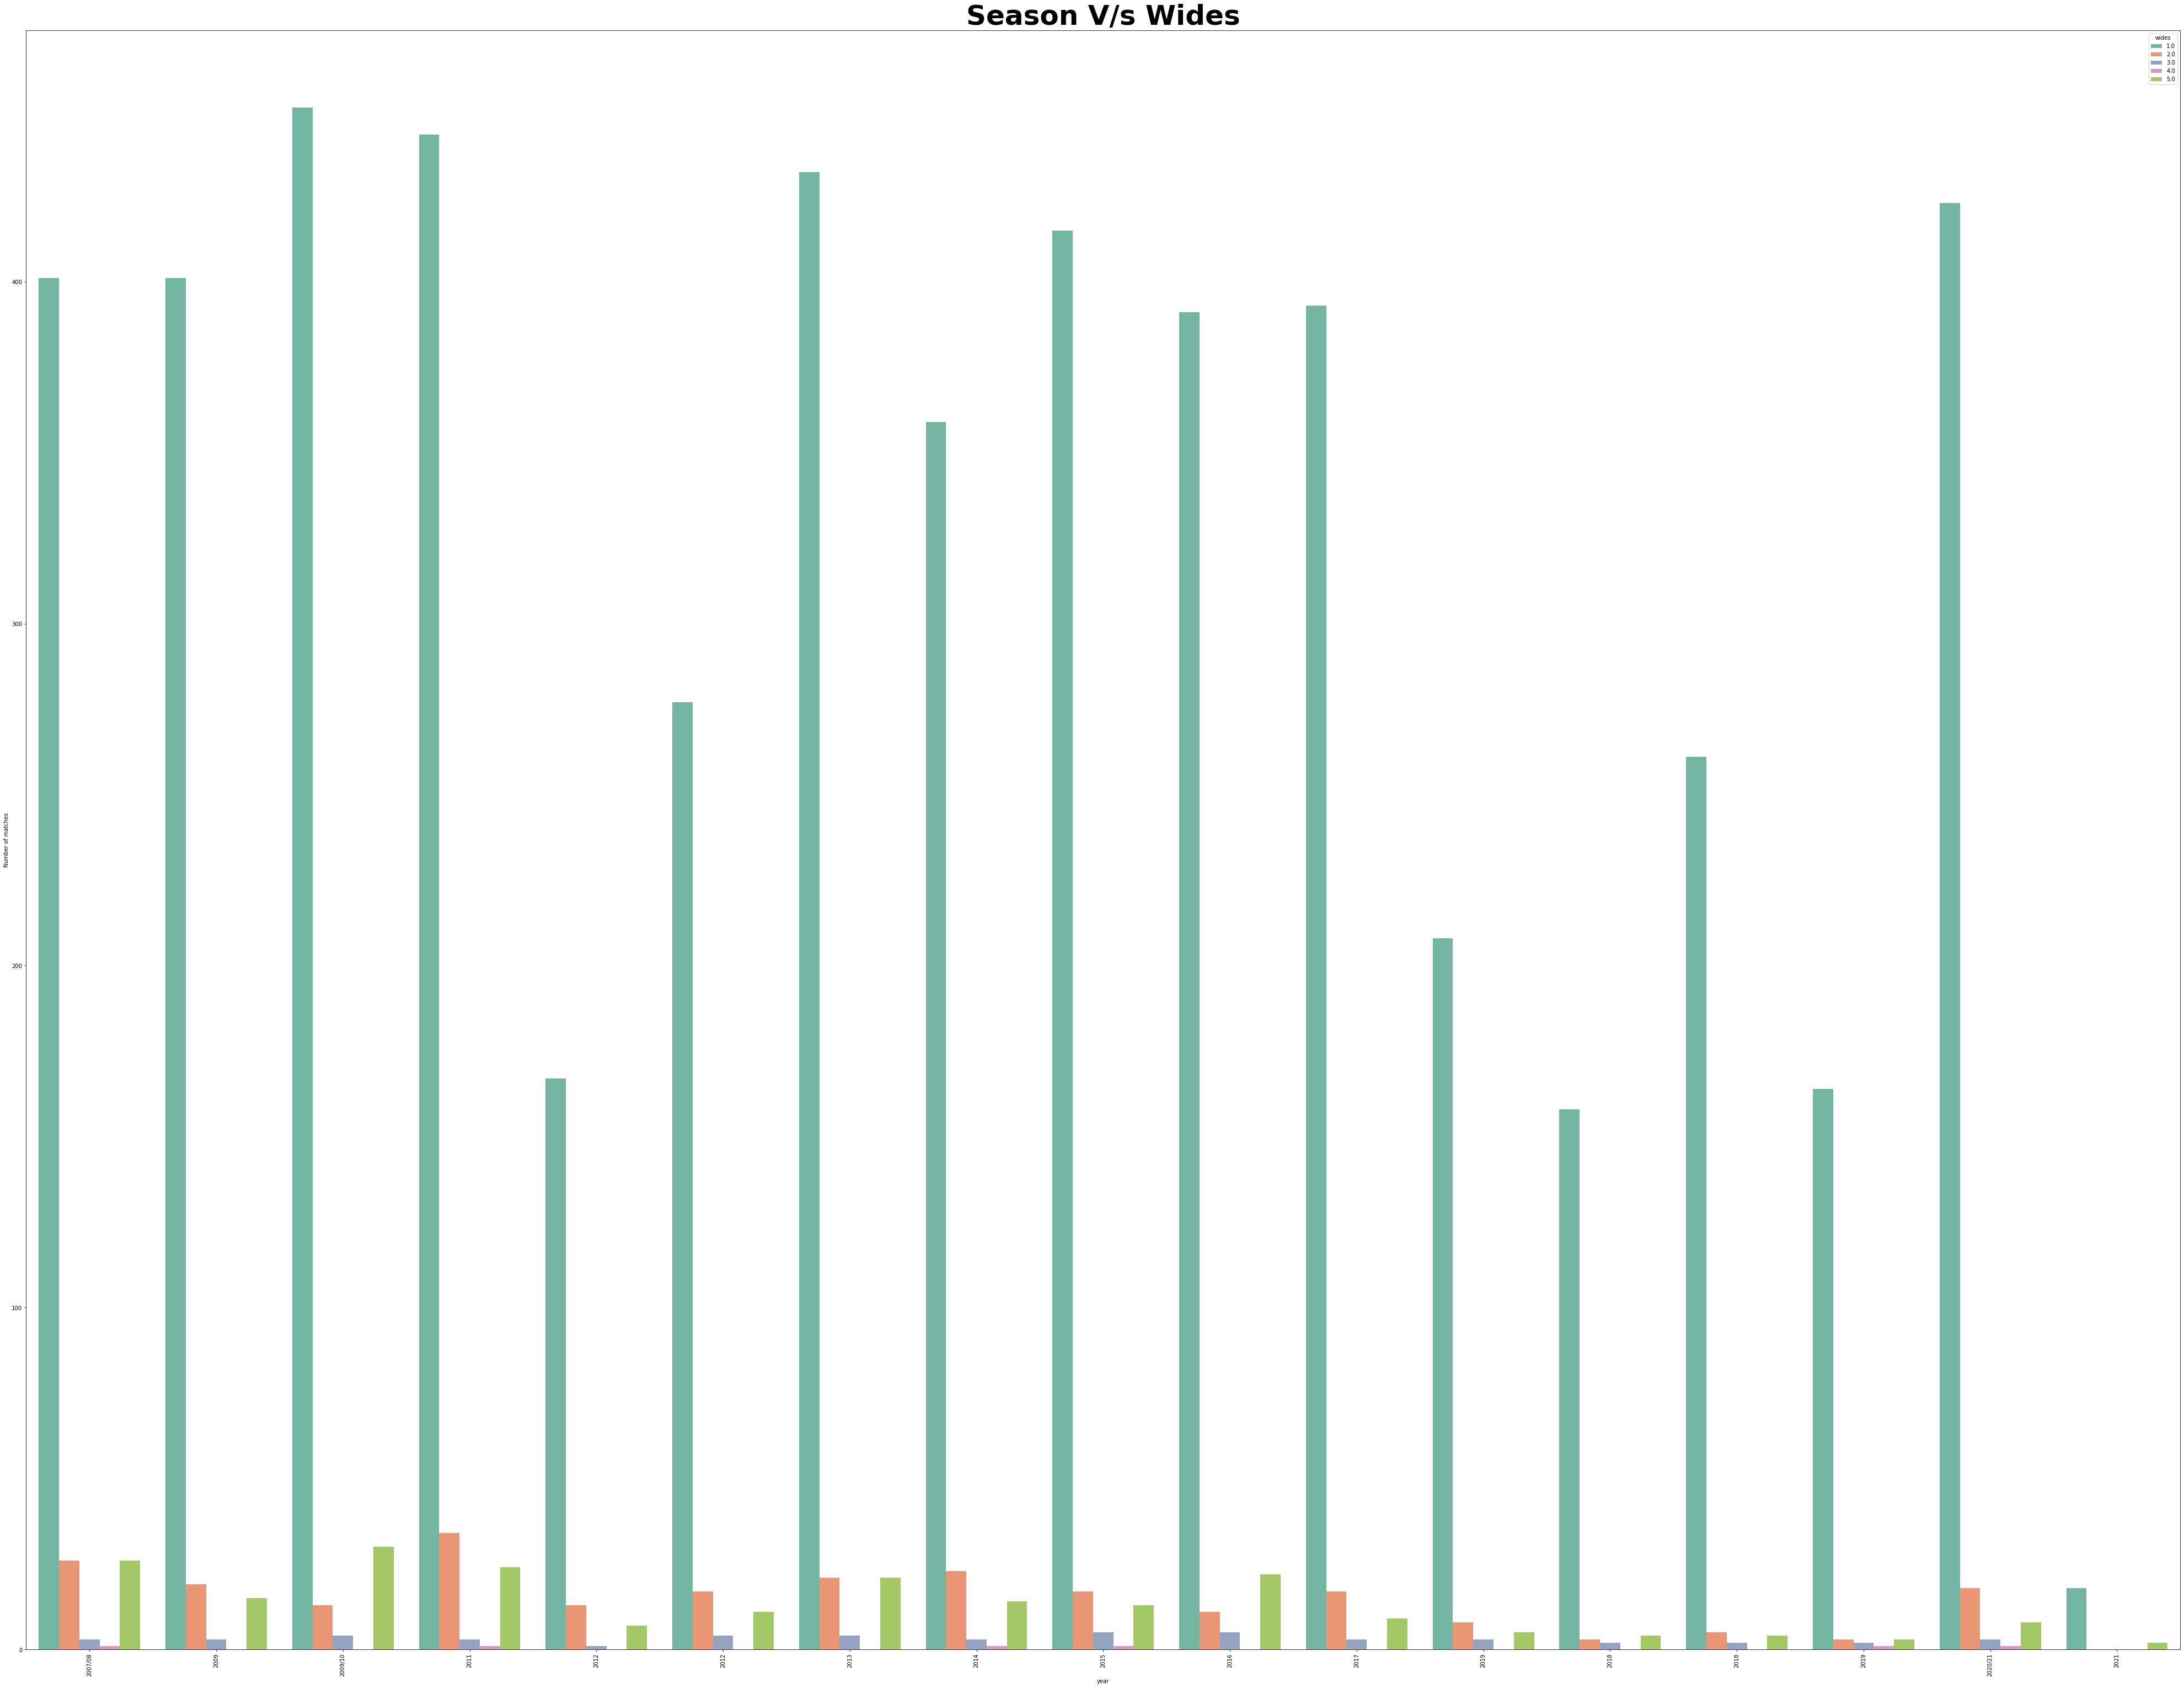

In [21]:
sns.countplot(x=df['season'], hue='wides', data=df, linewidth=7, palette = "Set2")
plt.ylabel('Number of matches')
plt.xticks(rotation=90)
plt.xlabel('year')
plt.title('Season V/s Wides',size=50, fontweight="bold")

Text(0.5, 1.0, 'Season V/s legbyes')

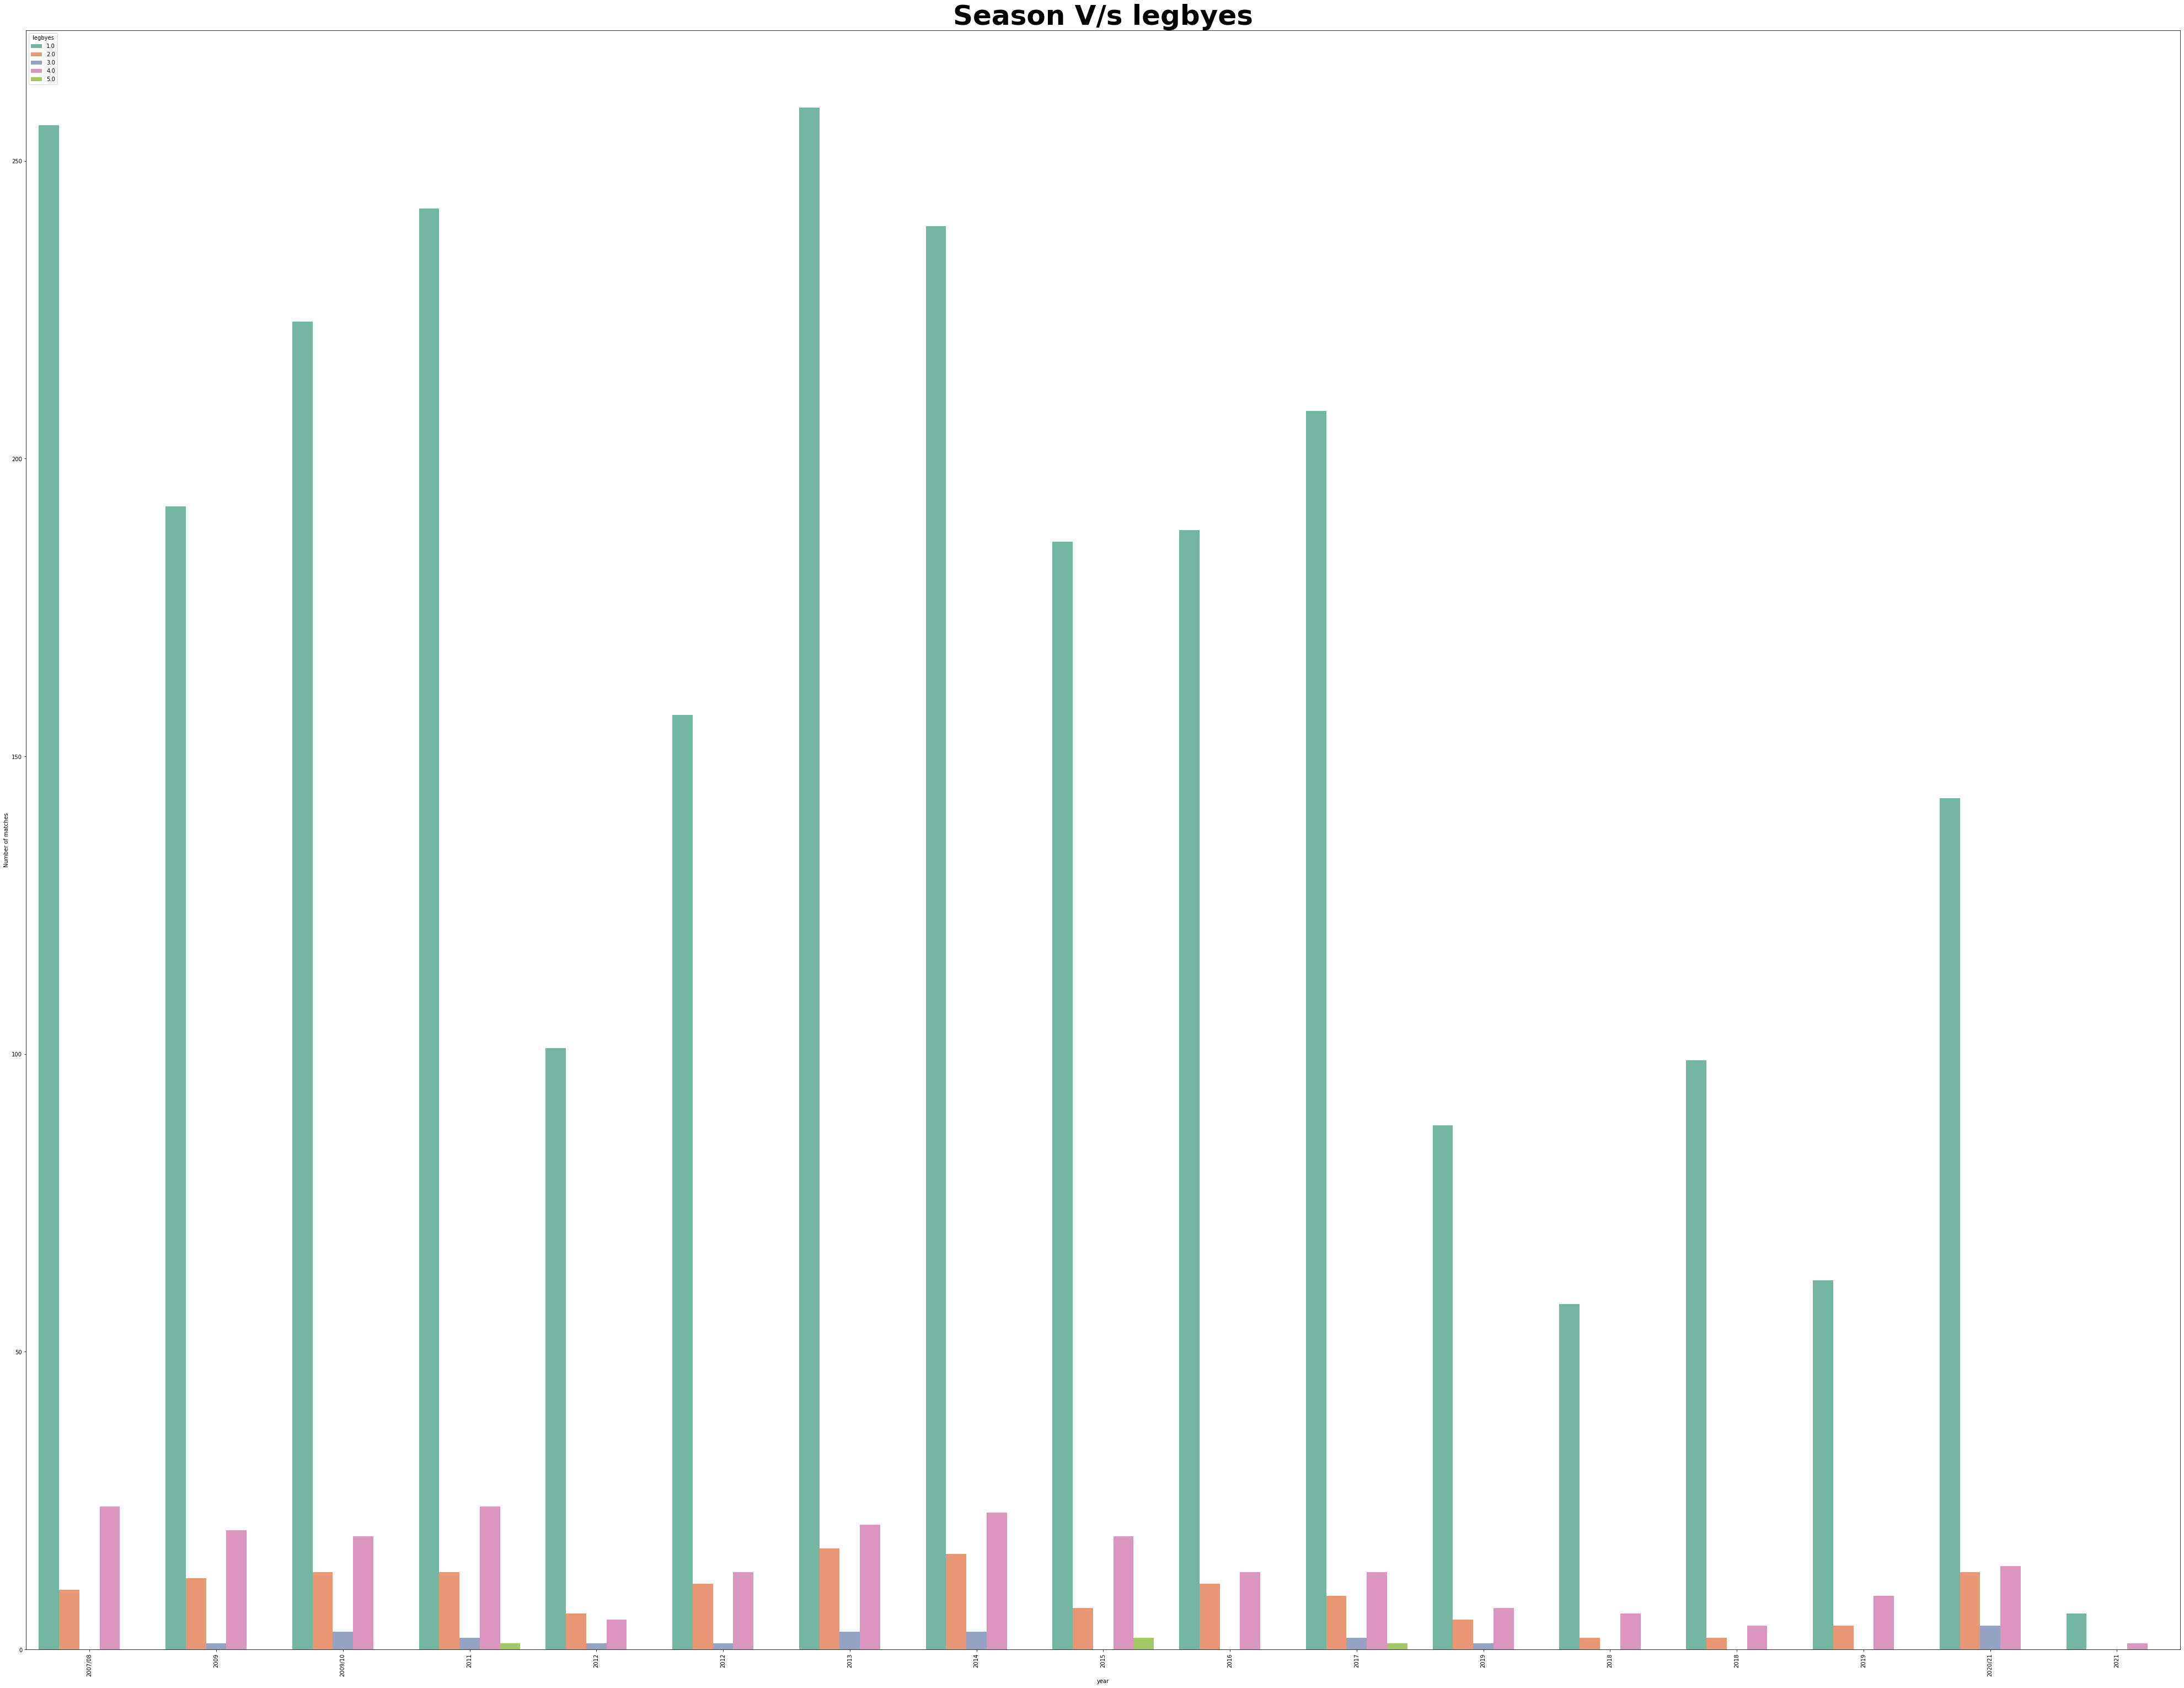

In [22]:
sns.countplot(x=df['season'], hue='legbyes', data=df, linewidth=7, palette = "Set2")
plt.ylabel('Number of matches')
plt.xticks(rotation=90)
plt.xlabel('year')
plt.title('Season V/s legbyes',size=50, fontweight="bold")

Text(0.5, 1.0, 'Season V/s byes')

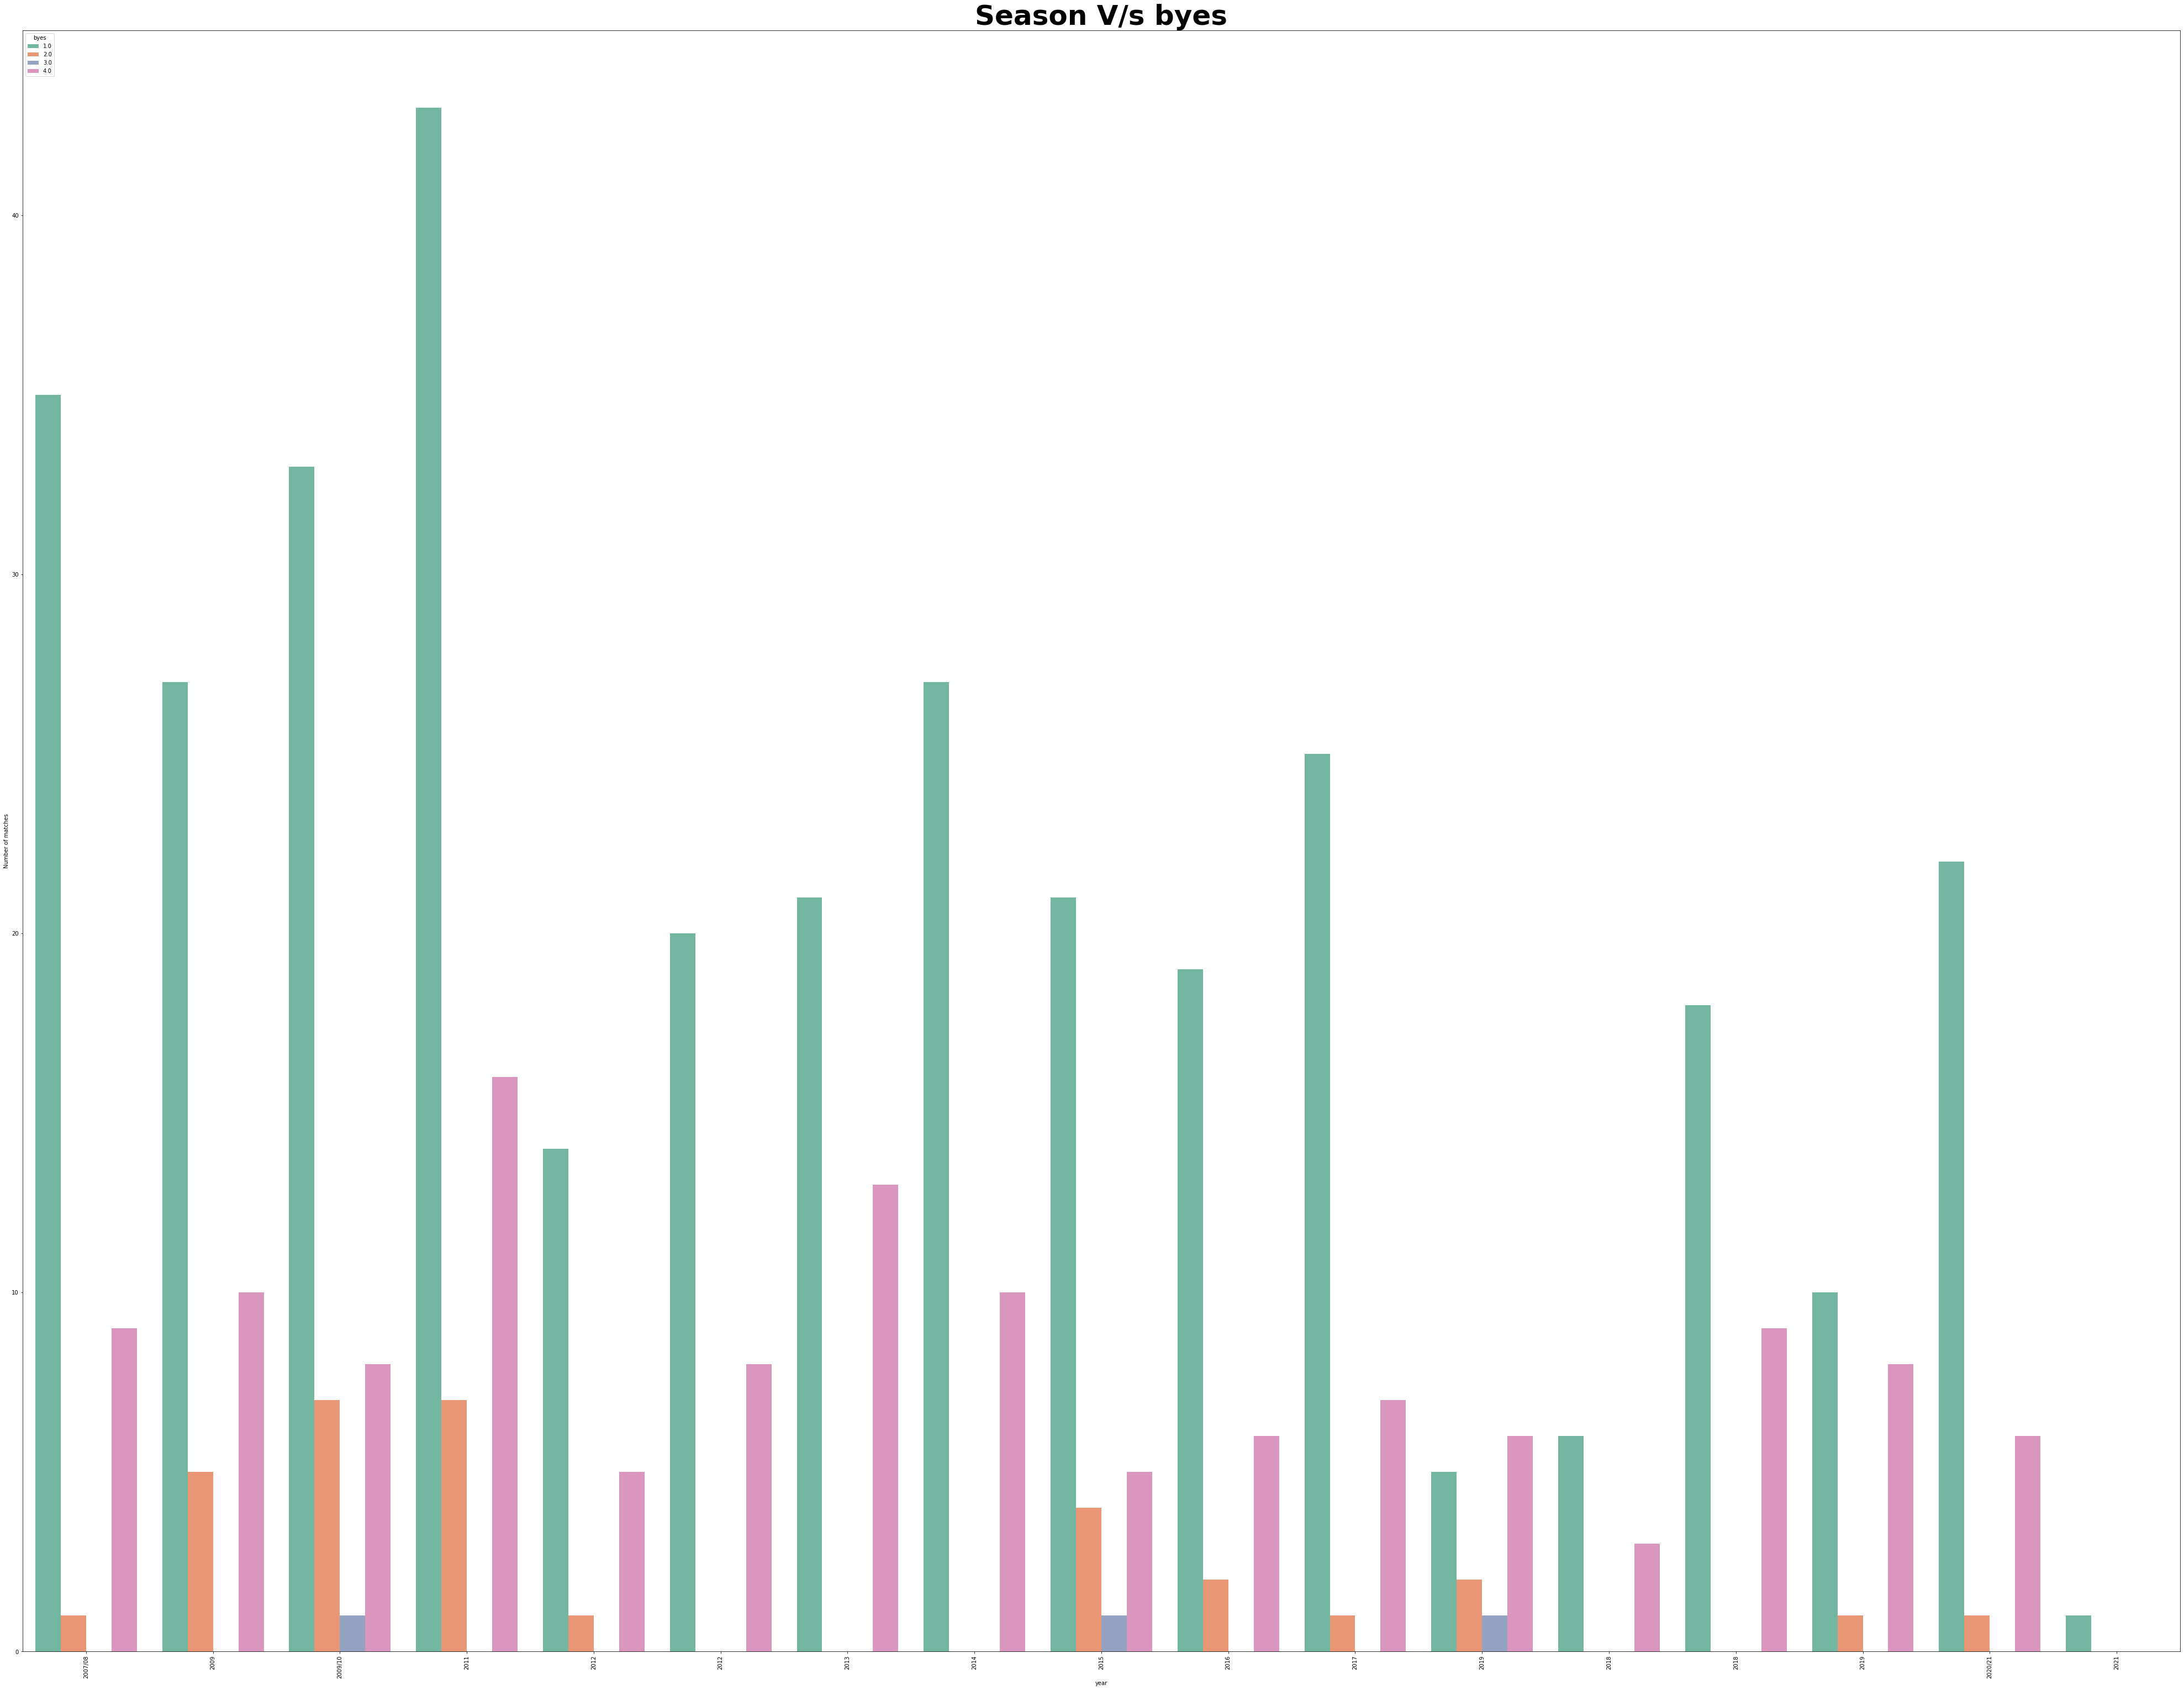

In [23]:
sns.countplot(x=df['season'], hue='byes', data=df, linewidth=7, palette = "Set2")
plt.ylabel('Number of matches')
plt.xticks(rotation=90)
plt.xlabel('year')
plt.title('Season V/s byes',size=50, fontweight="bold")